# Machine learning posible para tesis

Códigos posibles para el trabajo de tesis. Se seguirán distintas rutas para comparar cuál predice mejor.

## Ruta 1:

Se hará un ML convencional con los features obtenidos

In [ ]:
# primero cargar las imágenes-features y los labels.

import os
os.chdir("/personas/carpeta_de_data_funcional") # directorio de todas las carpetas

csv = r'/labels.csv' # archivo que contiene los labels



# puedo poner el path de una carpeta, ej:

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

fmri_file_path = r'/content/drive/MyDrive/100307/sujetos'
anat = r'/content/drive/MyDrive/100307/Classes+tlrc.BRIK'

fmri_mask = nilearn.image.load_img('../input/trends-assessment-prediction/fMRI_mask.nii')


In [ ]:
df = pd.read_csv("../input/trends-assessment-prediction/loading.csv")
features = list(df.columns[1:])

# these are the dependent variables
labels_df = pd.read_csv("../input/trends-assessment-prediction/train_scores.csv")

df = df.merge(labels_df, on="Id", how="left")
df = df.dropna()

In [ ]:
# imprimir alguna imagen de prueba para mirar si funcionó

from nilearn import plotting
from nilearn import image
from nilearn.image import load_img

# poner aqui la imagen a cargar
func_img = load_img(imagen_de_prueba)
# no sirve para imágenes 4D ni 3D sin Header, es decir .BRIK
# los reho, ec y dc son nii.gz, los rsfc son BRIK

plotting.plot_stat_map(func_img)

In [ ]:
func_img.shape # imprime las 3 dimensiones de la data y los volúmenes temporales, en ese orden

Nilearn also provides many methods for plotting this kind of data. For example, we can use nilearn.plotting.view_img to launch at interactive viewer. Because each fMRI run is a 4D time series (three spatial dimensions plus time), we’ll also need to subset the data when we plot it, so that we can look at a single 3D image. Nilearn provides (at least) two ways to do this: with nilearn.image.index_img, which allows us to index a particular frame–or several frames–of a time series, and nilearn.image.mean_img, which allows us to take the mean 3D image over time.

In [ ]:
from nilearn import plotting

mean_image = image.mean_img(imagen_de_prueba)
plotting.view_img(mean_image, threshold=None)

In [ ]:
# se deben juntar los features en una misma matriz al parecer, buscar más al respecto
# probar con flattern


In [ ]:
# mi otra opción es hacer Rois y en base a estos
from nilearn.input_data import NiftiMasker
roi_mask_img = 'ruta_a_tu_mascara_roi.nii.gz'  # Ruta a la máscara del ROI

# Inicializa el objeto NiftiMasker con la máscara del ROI

masker = NiftiMasker(mask_img=roi_mask_img)

#Ajusta el masker a los datos fMRI y transforma los datos en serie temporal promedio
time_series = masker.fit_transform(fmri_img) # Calcula la activación promedio a lo largo del tiempo
mean_activation = np.mean(time_series, axis=0)
print("Activación promedio en el ROI:", mean_activation)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mean_activation)
plt.title("Activación promedio en el ROI")
plt.xlabel("Tiempo")
plt.ylabel("Señal promedio")
plt.show()

In [ ]:
# con esto, se tendrán 90 valores por máscara que se pueden usar como features normales.
# creo que estos valores debería colocarlos en un excel y eso usarlo como input de features


In [ ]:
# Divide aquí tus datos, aquí se agregan los labels correspondientes

# https://github.com/IIC2613-Inteligencia-Artificial-2023-2/Syllabus/blob/main/Ayudantias/Ayudantia%208/Ayudant%C3%ADa_8.ipynb

X_train, X_test, y_train, y_test = train_test_split(image_data, prices, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

# Veamos cuántas imágenes tenemos en el entrenamiento para generar el test de validación:
print(X_train.shape[0]*0.3)

# Vemos también el tamaño de la imagen para luego saber qué input.shape tenemos:
print(X_train.shape[1], "es el número de pixels \n")


In [ ]:
# Tomamos las primeras 1500 imágenes, ya que eso es cerca del 30% del set de entrenamiento:
X_valid = X_train[:1500]
X_train = X_train[1500:]

y_valid = y_train[:1500]
y_train = y_train[1500:]

In [ ]:
# Evaluaremos ahora la calidad de nuestra predicción

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

# Nuevo intento:

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
sujeto = r'/content/drive/MyDrive/intento_cosas/101915_BLUR_01.nii.gz'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.2 MB/s eta 0:00:00


In [ ]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd

Dimensiones del archivo: (91, 109, 91, 400)


In [ ]:
wolumenes = img.get_fdata()[:, :, :, 0]
print(wolumenes.shape)

(91, 109, 91, 400)
(91, 109, 91)


Atlas ROIs are located at: /root/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


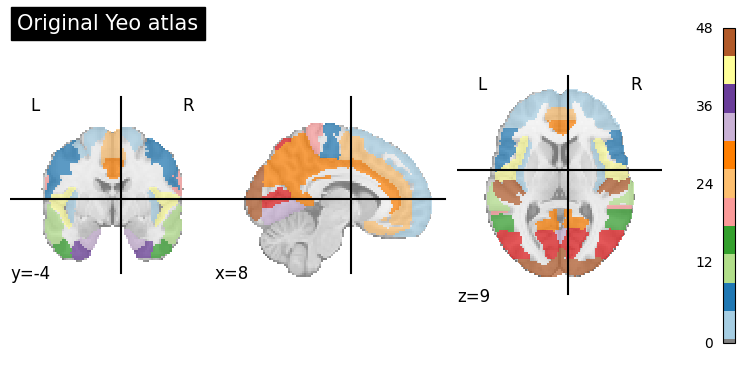

In [ ]:
dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_ho_filename = dataset_ho.filename
# print(f"Atlas ROIs are located at: {atlas_ho_filename}")

# plotting.plot_roi(
#     atlas_ho_filename,
#     title="Original Yeo atlas",
#     cut_coords=(8, -4, 9),
#     colorbar=True,
#     cmap="Paired",
# )

In [ ]:
# initialize masker (change verbosity)
masker = NiftiLabelsMasker(labels_img=atlas_ho_filename, standardize=True,
                           memory='nilearn_cache', resampling_target="data",
                           detrend=True, verbose=0)
time_series = masker.fit_transform(img)

In [ ]:
# Número de ROIs extraídos
time, n_rois = time_series.shape[0], time_series.shape[1]
print(f"Número de ROIs extraídos: {n_rois}, número de cortes temporales: {time}")

Número de ROIs extraídos: 48, número de cortes temporales: 400


In [ ]:
# Calcular el promedio de cada ROI
mean_signal_rois = np.mean(time_series, axis=0)

# Ver los promedios de cada ROI
print(mean_signal_rois)

# Guardar los promedios en un archivo CSV
df_mean_signal = pd.DataFrame(mean_signal_rois, columns=['Mean Signal'])
df_mean_signal.to_csv('mean_signal_rois.csv', index=False)

print("Archivo con los promedios guardado: mean_signal_rois.csv")

[ 5.55813315e-08 -1.63912772e-09  5.42402283e-08 -1.62422662e-08
  2.72691256e-08  3.78675757e-08 -3.06963912e-08  2.71201142e-08
  4.55975524e-08  2.21282246e-08 -4.84287721e-09  3.33786012e-08
 -2.33203181e-08  1.02072955e-08  2.74181371e-08 -6.70552280e-10
  2.98023224e-08  1.25169750e-08  6.60121415e-08 -2.50339500e-08
 -3.88920292e-08 -2.98023217e-10  9.64850173e-08  2.08616258e-09
 -7.89761572e-08  3.59117998e-08 -9.64943325e-08  2.74181371e-08
 -8.34465030e-09 -2.98023228e-09  3.12924371e-08  5.96046434e-10
 -2.01165684e-09 -1.74343580e-08  1.96695336e-08  6.11413276e-09
  5.06639486e-09  5.06639486e-09  2.83122059e-08  3.60608112e-08
  2.05636024e-08  2.97278167e-08 -1.66893006e-08  1.02818012e-08
 -1.63912777e-08 -1.41561030e-08 -3.06963912e-08  2.04332178e-08]
Archivo con los promedios guardado: mean_signal_rois.csv


# Versión tradicional:

In [ ]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd

In [ ]:
# hacer un código que me genere las listas de sujetos que necesito

sujeta = os.path.join(name)
lista_archivos.append(sujeta)

In [ ]:
# primero cargar data igual que antes
lista_sujetos = ["1", "2", "3"]

lista_sujeto = []
for sujeto in lista_sujetos:
  img = nib.load(sujeto)
  print("Dimensiones del archivo:", img.shape) # aquí cargamos el array en 3D
  img_flat = aplanacion(img)
  lista_sujeto.append(img_flat)



def aplanacion(img):
    test1 = np.array(x)
    flatten= matrix.flatten(test1)
    return flatten[0:1000]

print(lista_planos[0].shape)



In [ ]:
from sklearn.decomposition import PCA

# Asumiendo que 'time_series' contiene las series de tiempo extraídas de las regiones activas
pca = PCA(n_components=20)  # Puedes ajustar el número de componentes
X_pca = pca.fit_transform(lista_planos)

# Ahora tienes los datos reducidos en dimensionalidad


In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=20)  # Ajusta según tu caso
X_ica = ica.fit_transform(lista_planos)


In [ ]:
# llamamos al csv de los labels:

data = pd.read_csv("labels.csv", index_col=0)
data

In [ ]:
# Para ver si hay una relación entre una columna u otra, podemos jugar con:

data.groupby("Pclass").mean()["Survived"] # donde ponemos la etiquetade cada columna

# EJ:
data.groupby(["Sex", "Pclass"]).mean()["Survived"]

Ej de lo anterior:

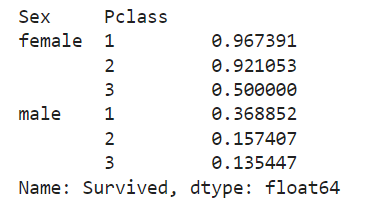

In [ ]:
# categorias por roi:

data.nunique()
data.shape # tamaño de la data en csv

In [ ]:
# quitamos ponemos las etiquetas en y y lo demás en x

X = data_training.loc[:, data_training.columns != "label"]
y = data_training["label"]

In [ ]:
# Este paso quizá es omitible
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # aquí separamos la data, quizá yo lo haga manual

In [ ]:
print(f"Tamaño X train {X_train.shape}")
print(f"Tamaño y train {y_train.shape}")
print(f"Tamaño X test  {X_test.shape}")
print(f"Tamaño y test  {y_test.shape}")

In [ ]:
# modelo

from sklearn import svm

classifier = svm.SVC()


In [ ]:
# Para ver el desempeño del modelo:

from sklearn.metrics import accuracy_score

metrics.accuracy_score(y_test, y_predict)

conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Para promediar cross-validation

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier  # Suponiendo que usas RandomForest

# Crear el array de grupos
n_groups = X.shape[0] // 3  # Número total de grupos (cada 3 filas corresponden a un sujeto)
groups = np.repeat(np.arange(n_groups), 3)

# Definir GroupKFold
gkf = GroupKFold(n_splits=3)  # Número de folds

# Inicializar el modelo
random_forest = RandomForestClassifier()  # Asegúrate de que esto esté definido correctamente antes de este código

# Inicializar listas para acumular métricas
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]

    # Entrenar el modelo
    random_forest.fit(X_train2, y_train2)

    # Predecir en el conjunto de prueba
    y_pred = random_forest.predict(X_test2)

    # Calcular y acumular las métricas para este fold
    accuracy_list.append(accuracy_score(y_test2, y_pred))
    precision_list.append(precision_score(y_test2, y_pred, average='weighted'))  # Usamos 'weighted' por clases desbalanceadas
    recall_list.append(recall_score(y_test2, y_pred, average='weighted'))
    f1_list.append(f1_score(y_test2, y_pred, average='weighted'))

    # Mostrar el reporte de clasificación para este fold (opcional)
    print(classification_report(y_test2, y_pred))

# Calcular los promedios de las métricas
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)

# Mostrar los resultados promedio
print(f'Promedio de precisión: {average_accuracy:.2f}')
print(f'Promedio de precisión (precision): {average_precision:.2f}')
print(f'Promedio de recall: {average_recall:.2f}')
print(f'Promedio de f1-score: {average_f1:.2f}')
